In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline

In [49]:
data=pd.read_csv(r'D:\pandasdataset\project\bhp\Bengaluru_House_Data.csv')

In [50]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### chcking for missing values

In [51]:
total=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count())
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data

,total,percent
area_type,0,0.000000
availability,0,0.000000
location,1,0.000075
size,16,0.001201
society,5502,0.413063
total_sqft,0,0.000000
bath,73,0.005480
balcony,609,0.045721
price,0,0.000000


#### we will handle missing values of individual features during data exploration

### Exploring 'area_type' variable

In [52]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

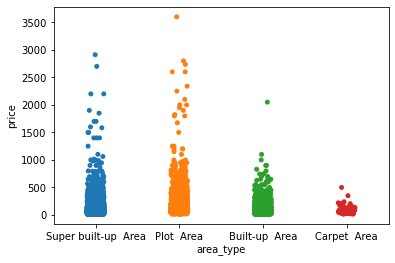

In [53]:
sn.stripplot(x=data['area_type'],y=data['price'],data=data)

#### Properties offered by Carpet area are seems to be less costly. Properties offered by Super built-up area and Plot area are looking more costly

### lets perform EDA for 'availability' feature
#### assuming data is prepared in the month of Jan2017, creating new feature 'waiting period in month'

In [54]:
waiting=data['availability'].str.split(pat = "-",expand=True)
data['waiting_year']=waiting[0]
data['waiting_month']=waiting[1]
data['waiting_period']=0
data['waiting_year']=data['waiting_year'].replace(['Ready To Move','Immediate Possession','16','15','14'],17)
data['waiting_month']=data['waiting_month'].fillna('Jan')

In [55]:
data.loc[data['waiting_month'].str.contains('Jan'),'waiting_month1']=0
data.loc[data['waiting_month'].str.contains('Feb'),'waiting_month1']=1
data.loc[data['waiting_month'].str.contains('Mar'),'waiting_month1']=2
data.loc[data['waiting_month'].str.contains('Apr'),'waiting_month1']=3
data.loc[data['waiting_month'].str.contains('May'),'waiting_month1']=4
data.loc[data['waiting_month'].str.contains('Jun'),'waiting_month1']=5
data.loc[data['waiting_month'].str.contains('Jul'),'waiting_month1']=6
data.loc[data['waiting_month'].str.contains('Aug'),'waiting_month1']=7
data.loc[data['waiting_month'].str.contains('Sep'),'waiting_month1']=8
data.loc[data['waiting_month'].str.contains('Oct'),'waiting_month1']=9
data.loc[data['waiting_month'].str.contains('Nov'),'waiting_month1']=10
data.loc[data['waiting_month'].str.contains('Dec'),'waiting_month1']=11

In [56]:
data['waiting_period']=((data['waiting_year'].astype(int)-17)*12)+data['waiting_month1'].astype(int)

In [57]:
data=data.drop(['availability','waiting_year','waiting_month','waiting_month1'],axis=1)

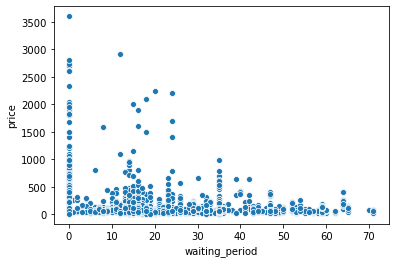

In [58]:
sn.scatterplot(data['waiting_period'],data['price'])

#### It can be clearly observe that ready to move properties are more costly. 
#### Again cost of property decreases as waiting period increases

### exploring 'location' feature

In [59]:
data.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [60]:
data['location'].value_counts()

Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Handenahalli              1
Bharathnagar              1
white field,kadugodi      1
Haralur Road,             1
Shauhardha Layout         1
Name: location, Length: 1305, dtype: int64

#### we have 1305 different locations, which will create more dummy columns during model building
#### changing location name to 'others' if location appears less than 10 times

In [61]:
data.location=data['location'].astype(str)
data.location=data['location'].apply(lambda x:x.strip())
location_count=data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_less_than_10=location_count[location_count<=10]
location_less_than_10

location
Dodsworth Layout       10
Ganga Nagar            10
Sadashiva Nagar        10
Sector 1 HSR Layout    10
Basapura               10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1054, dtype: int64

In [62]:
data.location=data.location.apply(lambda x:'others' if x in location_less_than_10 else x)

### Lets perform EDA on 'size' variable

In [67]:
data['size']=data['size'].astype(object)

In [68]:
data.loc[data['size'].isnull()]

,area_type,location,size,society,total_sqft,bath,balcony,price,waiting_period
579,Plot Area,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,0
1775,Plot Area,others,NaN,Orana N,2000 - 5634,NaN,NaN,124.000,0
2264,Plot Area,Banashankari,NaN,NaN,2400,NaN,NaN,460.000,0
2809,Plot Area,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785,0
2862,Plot Area,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800,0
5333,Plot Area,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115,0
6423,Plot Area,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730,0
6636,Plot Area,Jigani,NaN,S2enste,1500,NaN,NaN,25.490,0
6719,Plot Area,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545,0
7680,Plot Area,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000,0


#### All NA values are present for 'plot_area_type'. lets impute NA's based on 'area-type' and 'price' feature

In [69]:
data['size']=data['size'].str.replace('Bedroom','BHK')
pd.pivot_table(data,index='size',columns='area_type',values='price',aggfunc='mean',fill_value=0)

area_type,Built-up Area,Carpet Area,Plot Area,Super built-up Area
size,,,,
1 BHK,56.931879,43.885833,70.396429,36.351214
1 RK,28.625000,0.000000,0.000000,27.898889
10 BHK,200.000000,0.000000,594.090909,342.500000
11 BHK,0.000000,0.000000,160.000000,255.000000
12 BHK,0.000000,0.000000,300.000000,0.000000
13 BHK,0.000000,0.000000,0.000000,275.000000
14 BHK,0.000000,0.000000,0.000000,125.000000
16 BHK,0.000000,0.000000,0.000000,550.000000
18 BHK,0.000000,0.000000,200.000000,0.000000


In [70]:
data.loc[((data['size'].isnull()) & (data['price'] <= 70)),'size']='1 BHK'
data.loc[((data['size'].isnull()) & (data['price'] <= 150)),'size']='2 BHK'
data.loc[((data['size'].isnull()) & (data['price'] <= 200)),'size']='3 BHK'
data.loc[((data['size'].isnull()) & (data['price'] <= 500)),'size']='10 BHK'

#### lets convert 'size' variable into numeric by removing BHK from entire column

In [71]:
data['size']=data['size'].apply(lambda x:int(x.split(' ')[0]))

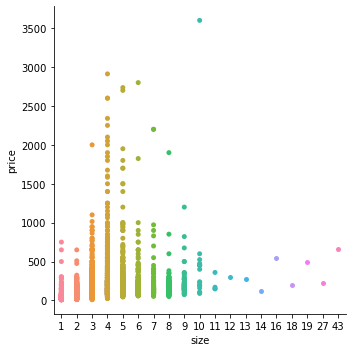

In [72]:
sn.catplot('size','price',jitter=False,data=data)

#### It seems that 4BHK and 5BHK flats are more costly. Again few extreme values are visible which need to be remove before model building

### Lets explore 'total_sqft' variable first
#### finding unique values for total sqft variable as it seems that few values are pseudonumeric

In [73]:
data['total_sqft']=data['total_sqft'].astype(str)

##### we have many pseudonumeric values for eg. 1133-1384, 34.5sq.meter etc
#### lets extract numeric values from special area units like 'Sq. Yard, Sq. Meter' and convert it to 'Sq Feet'
#### also we will drop rows with area dimensions given in 'acres, gunthas, perch' as they are showing land prices.
#### lets change datatype to numeric for pseudonumeric values(for eg. '1133 - 1384') by taking avg of two values
#### before that lets find which values are pseudonumeric

In [74]:
data[data['total_sqft'].str.contains('[A-Za-z]')]

,area_type,location,size,society,total_sqft,bath,balcony,price,waiting_period
410,Super built-up Area,Kengeri,1,NaN,34.46Sq. Meter,1.0,0.0,18.50,0
648,Built-up Area,Arekere,9,NaN,4125Perch,9.0,NaN,265.00,0
775,Built-up Area,others,1,NaN,1000Sq. Meter,2.0,1.0,93.00,0
872,Super built-up Area,others,2,NaN,1100Sq. Yards,2.0,NaN,45.00,0
1019,Plot Area,others,1,NaN,5.31Acres,1.0,0.0,110.00,14
1086,Plot Area,others,2,NaN,30Acres,2.0,2.0,29.50,26
1400,Super built-up Area,Chamrajpet,9,NaN,716Sq. Meter,9.0,1.0,296.00,0
1712,Plot Area,others,3,CoiewSy,1500Sq. Meter,3.0,1.0,95.00,0
1743,Super built-up Area,Hosa Road,3,Sosisic,142.61Sq. Meter,3.0,1.0,115.00,26
1821,Plot Area,Sarjapur,3,Inensba,1574Sq. Yards,3.0,1.0,76.00,0


In [75]:
data['area_num']=data['total_sqft'].str.replace('([A-Za-z]+)','')
data['area']=data['total_sqft'].str.replace("\d+",'')

In [76]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [77]:
data[~data['area_num'].apply(is_float)]

,area_type,location,size,society,total_sqft,bath,balcony,price,waiting_period,area_num,area
30,Super built-up Area,Yelahanka,4,LedorSa,2100 - 2850,4.0,0.0,186.000,35,2100 - 2850,-
56,Built-up Area,Devanahalli,4,BrereAt,3010 - 3410,NaN,NaN,192.000,37,3010 - 3410,-
81,Built-up Area,Hennur Road,4,Gollela,2957 - 3450,NaN,NaN,224.500,21,2957 - 3450,-
122,Super built-up Area,Hebbal,4,SNontle,3067 - 8156,4.0,0.0,477.000,14,3067 - 8156,-
137,Super built-up Area,8th Phase JP Nagar,2,Vaarech,1042 - 1105,2.0,0.0,54.005,26,1042 - 1105,-
...,...,...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,3,Sodgere,1804 - 2273,3.0,0.0,122.000,16,1804 - 2273,-
13059,Super built-up Area,Harlur,2,Shodsir,1200 - 1470,2.0,0.0,72.760,0,1200 - 1470,-
13240,Super built-up Area,Devanahalli,1,Pardsri,1020 - 1130,NaN,NaN,52.570,0,1020 - 1130,-
13265,Super built-up Area,Hoodi,2,Ranuetz,1133 - 1384,2.0,0.0,59.135,44,1133 - 1384,-


In [78]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None

In [79]:
data['area_num']=data['area_num'].apply(convert_sqft_to_num)

In [80]:
data.loc[data['area'].str.contains('Acre'),'area_num']=None
data.loc[data['area'].str.contains('Meter'),'area_num']=data['area_num']*10.764
data.loc[data['area'].str.contains('Yard'),'area_num']=data['area_num']*9
data.loc[data['area'].str.contains('Guntha'),'area_num']=None
data.loc[data['area'].str.contains('Perch'),'area_num']=None
data.loc[data['area'].str.contains('Cents'),'area_num']=None

In [81]:
data['total_sqft']=data['area_num']

In [82]:
data=data.drop(['area_num','area'],axis=1)

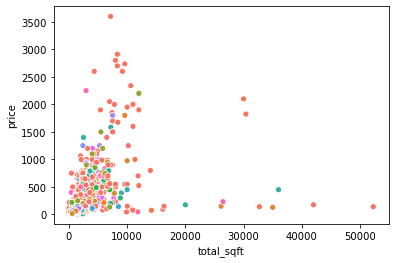

In [83]:
sn.scatterplot(x='total_sqft',y='price',hue='location',legend=False,data=data)

#### It can be observe that 'price' and 'total_sqft' have positive correlation. But few outliers can be easily obseve on chart

#### we have mark some values as NA, we will drop those rows before model building

### Exploring 'bath' variable

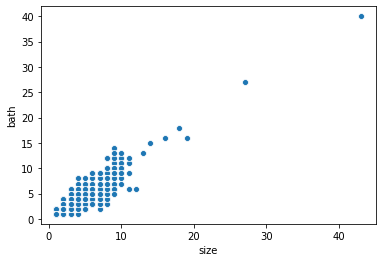

In [84]:
sn.scatterplot(data['size'],data['bath'])

#### It can be observe that 'size' and 'bath' are strongly correlated to each other. Therefore we will drop 'bath' variable to avoid MultiColinearity

### Exploring 'balcony' variable

### we have highest missing values in 'society' feature followed by 'balcony'

In [85]:
pd.pivot_table(data,index='size',columns='bath',values='balcony',aggfunc='mean',fill_value=0)

bath,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,27.0,40.0
size,,,,,,,,,,,,,,,,
1,0.766831,0.871795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
2,0.879310,1.447921,1.616667,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
3,0.000000,1.652086,1.908010,1.905797,1.612903,2.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
4,0.000000,1.064516,1.489247,1.779221,1.852535,1.551282,2.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
5,0.000000,1.000000,1.310345,1.577778,1.666667,2.000000,1.888889,3.000000,0.000000,0.000000,0,0,0,0,0,0
6,0.000000,0.000000,1.111111,1.562500,1.607143,1.970588,2.181818,1.571429,2.333333,0.000000,0,0,0,0,0,0
7,0.000000,2.000000,1.500000,1.500000,2.083333,2.000000,2.071429,1.500000,2.333333,0.000000,0,0,0,0,0,0
8,0.000000,0.000000,2.000000,1.600000,1.000000,1.857143,1.500000,1.826087,3.000000,1.666667,0,0,0,0,0,0
9,0.000000,0.000000,0.000000,0.000000,2.000000,2.200000,2.000000,2.000000,1.647059,3.000000,0,0,0,0,0,0


####  from above table, it can be observe that, for 1 RK flat size. balcony available is less than 1. whereas for 2 BHK flat size, balcony available is 1. Else for all remaining cases, avg balcony count is 2
####  for few cases, we have avg balcony count 3 which are for 8,9 and 10 BHK
#### Imputing NA based on size

In [86]:
data.loc[((data['balcony'].isnull()) & (data['size']==1)),'balcony']=1
data.loc[((data['balcony'].isnull()) & (data['size']==2)),'balcony']=1
data.loc[((data['balcony'].isnull()) & (data['size']==8)),'balcony']=3
data.loc[((data['balcony'].isnull()) & (data['size']==9)),'balcony']=3
data.loc[((data['balcony'].isnull()) & (data['size']==10)),'balcony']=3
data.loc[data['balcony'].isnull(),'balcony']=2

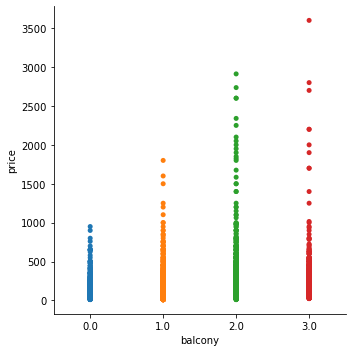

In [87]:
sn.catplot('balcony','price',jitter=False,data=data)

#### it can be clearly seen that price range to higher size increases from 0 balcony to 3 balcony property 

### Creating new feature 'price/sqft' to identify outliers

In [88]:
#creating new feature price/sqft
data['price/sqft']=data['price']*100000/data['total_sqft']

In [89]:
data['price/sqft'].describe()

count    1.329500e+04
mean     8.270136e+03
std      1.141812e+05
min      2.678298e+02
25%      4.263483e+03
50%      5.430566e+03
75%      7.312469e+03
max      1.200000e+07
Name: price/sqft, dtype: float64

### Dropping variable 'society'  and 'bath'

In [90]:
data=data.drop(['society','bath'],axis=1)
data.head()

,area_type,location,size,total_sqft,balcony,price,waiting_period,price/sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,1.0,39.07,35,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,3.0,120.00,0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,3.0,62.00,0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,1.0,95.00,0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,1.0,51.00,0,4250.000000


### Lets deal with outliers

<Figure size 7200x360 with 0 Axes>

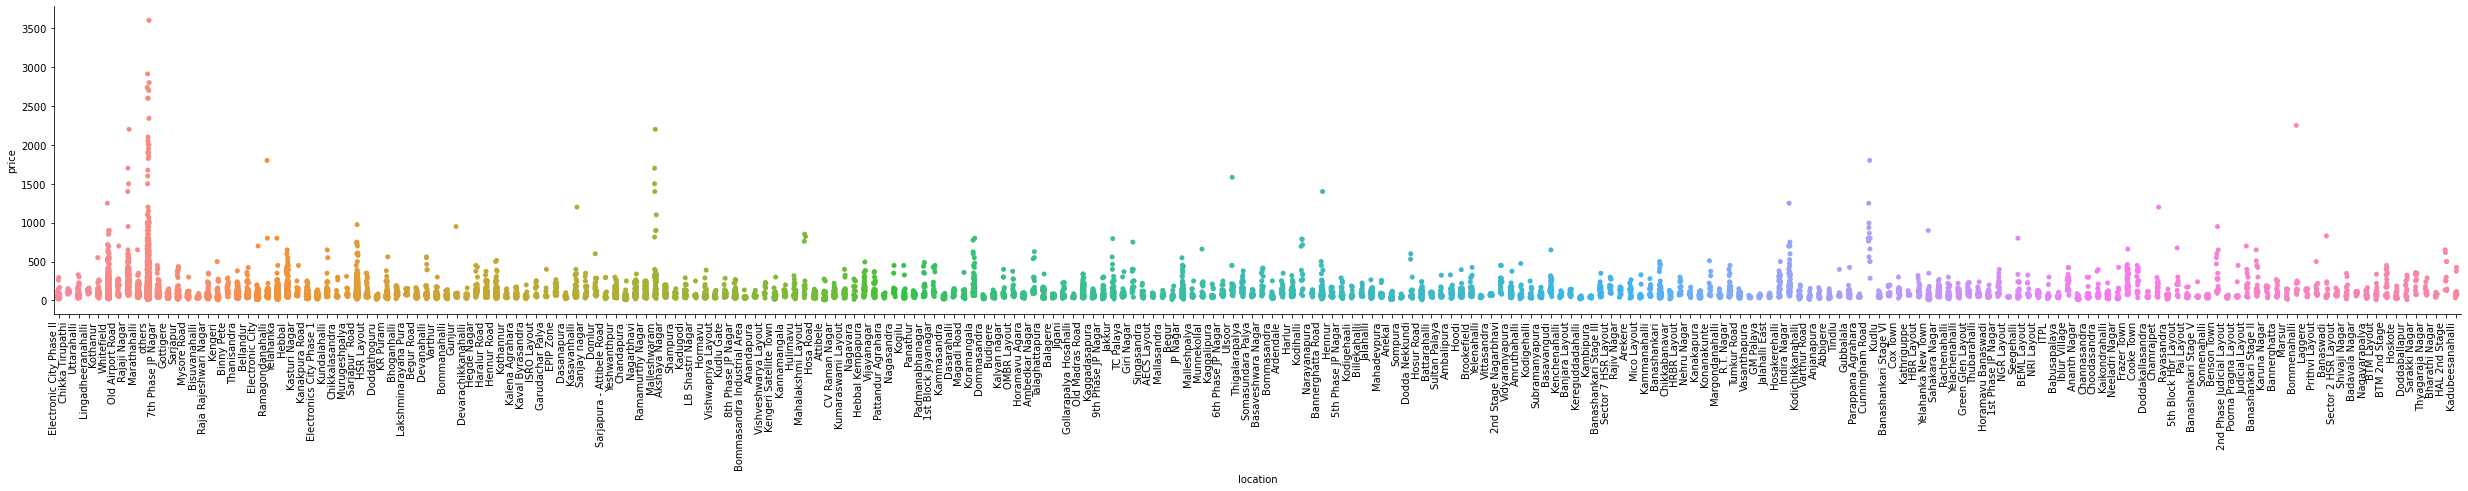

In [91]:
plt.figure(figsize=(100,5))
chart=sn.catplot('location','price',data=data,height=5,aspect=7)
chart.set_xticklabels(rotation=90,horizontalalignment='right')

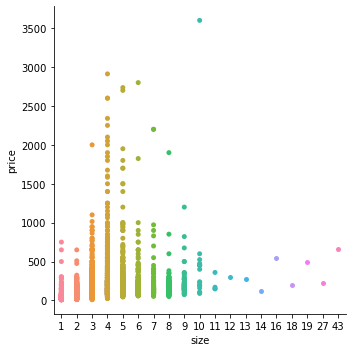

In [92]:
sn.catplot('size','price',jitter=False,data=data)

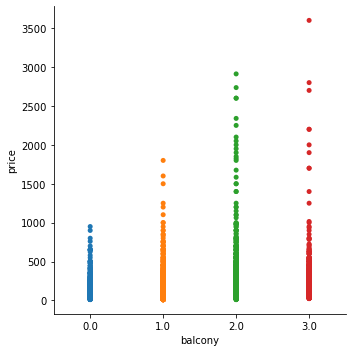

In [93]:
sn.catplot('balcony','price',jitter=False,data=data)

#### we have certain extreme values for 'locations','size' and 'balcony'. Removing all this extrme values one by one based on Std Deviation of price/sqft

In [94]:
def location_outliers(data):
    data_out=pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m=np.mean(subdf['price/sqft'])
        st=np.std(subdf['price/sqft'])
        reduced_df=subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        data_out=pd.concat([data_out,reduced_df],ignore_index=True)
    return data_out

In [95]:
data=location_outliers(data)

In [96]:
def size_outliers(data):
    data_out=pd.DataFrame()
    for key, subdf in data.groupby('size'):
        m=np.mean(subdf['price/sqft'])
        st=np.std(subdf['price/sqft'])
        reduced_df=subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        data_out=pd.concat([data_out,reduced_df],ignore_index=True)
    return data_out

In [97]:
data=size_outliers(data)

In [98]:
def balcony_outliers(data):
    data_out=pd.DataFrame()
    for key, subdf in data.groupby('balcony'):
        m=np.mean(subdf['price/sqft'])
        st=np.std(subdf['price/sqft'])
        reduced_df=subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        data_out=pd.concat([data_out,reduced_df],ignore_index=True)
    return data_out

In [99]:
data=balcony_outliers(data)

In [100]:
data.shape

(8081, 8)

#### we have removed outliers based on 'price/sqft'. Now analysing target variable for outliers

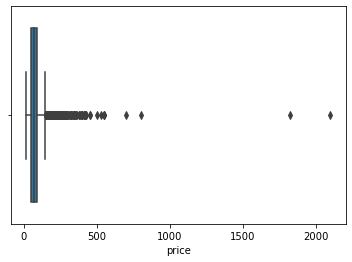

In [101]:
sn.boxplot('price',data=data)

#### We can observe, there are certain extreme values which need to taken care off 
#### lets remove 'price' datapoints having value more than 700

In [102]:
data=data[data.price<=700]

#### lets drop NA imputed during total_sqft EDA

In [103]:
data=data.dropna()

In [104]:
data.head()

,area_type,location,size,total_sqft,balcony,price,waiting_period,price/sqft
0,Super built-up Area,8th Phase JP Nagar,1,451.0,0.0,29.900,16,6629.711752
1,Super built-up Area,Balagere,1,790.5,0.0,41.900,36,5300.442758
2,Super built-up Area,Balagere,1,790.5,0.0,42.295,36,5350.411132
3,Super built-up Area,Banaswadi,1,527.0,0.0,35.000,0,6641.366224
4,Super built-up Area,Binny Pete,1,665.0,0.0,50.750,35,7631.578947


#### after removing outliers, lets  drop 'price/sqft' variable

In [105]:
data=data.drop(['price/sqft','area_type','waiting_period'],axis=1)

In [106]:
data.head()

,location,size,total_sqft,balcony,price
0,8th Phase JP Nagar,1,451.0,0.0,29.900
1,Balagere,1,790.5,0.0,41.900
2,Balagere,1,790.5,0.0,42.295
3,Banaswadi,1,527.0,0.0,35.000
4,Binny Pete,1,665.0,0.0,50.750


### Lets use LabelEncoding for 'area_type' feature

In [107]:
from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data['area_type']=le.fit_transform(data['area_type'])

### Lets create Dummies for 'Location' variable

In [108]:
dummies=pd.get_dummies(data['location'])

In [109]:
data=pd.concat([data,dummies.drop('others',axis=1)],axis=1)

In [110]:
data=data.drop('location',axis=1)

In [111]:
data.shape

(8078, 230)

In [112]:
data.head()

,size,total_sqft,balcony,price,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,451.0,0.0,29.900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,790.5,0.0,41.900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,790.5,0.0,42.295,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,527.0,0.0,35.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,665.0,0.0,50.750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
x=data.drop('price',axis=1)

In [114]:
y=data['price'].astype(int)

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,max_depth=7,random_state=15)

In [117]:
model=rf.fit(x_train,y_train)
model.score(x_train,y_train)

0.9135532790193432

In [118]:
prediction=model.predict(x_test)

In [119]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test,prediction))
print(np.sqrt(mse(y_test,prediction)))

270.1204118954785
16.435340334032592


In [120]:
model.score(x_test,y_test)

0.8935852081336622

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=4,test_size=0.2, random_state=0)
score=cross_val_score(model,x_train,y_train,cv=cv)
print(score)
print(np.mean(score))

[0.89005333 0.88722492 0.89917111 0.88348046]
0.8899824550559756


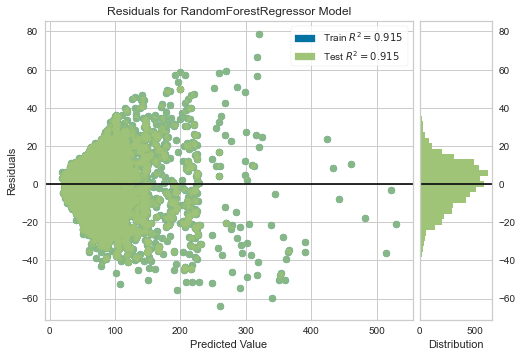

In [75]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(model)
visualizer.fit(x_train,y_train)
visualizer.score(x_train,y_train)
visualizer.show()

#### it can be observed from the histogram that error is normally distributed along 0 line

### LETS TEST OUR MODEL BEFORE EXPORTING FOR ACTUAL PRODUCTION

In [122]:
x.columns

Index(['size', 'total_sqft', 'balcony', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=229)

In [125]:
def predict_price(location,size,total_sqft,balcony):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=size
    X[1]=total_sqft
    X[2]=balcony
    if loc_index >= 0:
        X[loc_index]=1
    return model.predict([X])[0]

In [126]:
predict_price('1st Phase JP Nagar',3,1200,3)

60.39406796531816

In [127]:
import pickle
pickle.dump(model,open('house_price_model_pickle.pkl','wb'))

In [128]:
import json
columns ={
    'data_columns' : [col for col in x.columns]
}
with open ('columns.json','w') as f:
    json.dump(columns,f)

In [210]:
location='Vijayanagar'
loc_index=np.where(x.columns==location)[0][0]
loc_index

219

In [268]:
with open('columns.json', 'r') as f:
    __data_columns = json.load(f)['data_columns']

In [269]:
type(__data_columns)

list

In [270]:
data_columns=np.array(__data_columns,dtype="object")

In [271]:
data_columns

array(['size', 'total_sqft', 'balcony', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Bharathi Nagar', 'Bhoganhalli', 'Billekahalli',
       'Binny Pete', 'Bisuvanahalli', 'Bommanahalli', 'Bommasandra',
       'Bommenahall

In [215]:
type(x.columns)

pandas.core.indexes.base.Index

In [251]:
location='1st phase jp nagar'
loc_index=np.where(data_columns==location)[0][0]
loc_index

3

In [ ]:
loc_index=np.where(data_columns==location)[0][0]